In [244]:
# -*- coding: utf-8 -*- 
import pandas as pd
from time import time
import json
import codecs
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


In [579]:
df_CK = pd.read_csv('../data/CKIP_Dictionary_UTF8', delim_whitespace=True, header=None,
                   names=['phrase_name','total_count','tag_CK','count_CK','dummy_a','dummy_b'])
print(df_CK.shape)
df_CK.drop_duplicates(inplace=True)
print(df_CK.shape)
df_CK = df_CK.groupby(['phrase_name', 'tag_CK']).agg({'count_CK':'mean'})
df_CK.reset_index(inplace=True)
print(df_CK.shape)
df_CK.count_CK = df_CK.count_CK.apply(lambda x: str(int(x)))
print(df_CK.count_CK.dtype)
tag_CK_set = set(df_CK.tag_CK)
print(len(tag_CK_set))
df_CK.head()

(82783, 6)
(82779, 6)
(82760, 3)
object
210


,phrase_name,tag_CK,count_CK
0,一,Dd,4071
1,一,Neu,58398
2,一一,Dh,205
3,一丁不識,VH11,0
4,一丁點,Nad,5


In [580]:
f = {'count_CK': lambda x: '{}'.format(', '.join(x)), 'tag_CK': lambda x: '{}'.format(', '.join(x))}
df_CK = df_CK.groupby('phrase_name').agg(f).reset_index()
print(df_CK.shape)
df_CK.head(10)

(77448, 3)


,phrase_name,tag_CK,count_CK
0,一,"Dd, Neu","4071, 58398"
1,一一,Dh,205
2,一丁不識,VH11,0
3,一丁點,Nad,5
4,一下子,Dd,0
5,一不做二不休,VH11,1
6,一丘之貉,Naea,0
7,一乾二淨,VH11,6
8,一了百了,VH11,2
9,一五一十,Dh,2


In [581]:
df_j = pd.read_csv('../data/dict.txt.big.zh', delim_whitespace=True, header=None,
                   names=['phrase_name','count_j','tag_j'])
print(df_j.shape)

df_j.drop_duplicates(inplace=True)
print(df_j.shape)

df_j = df_j.groupby(['phrase_name', 'tag_j']).agg({'count_j':'mean'}).reset_index()
print(df_j.shape)

df_j.count_j = df_j.count_j.apply(lambda x: str(int(x)))
tag_j_set = set(df_j.tag_j)
print(len(tag_j_set))
print(df_j.count_j.dtype)
df_j.head()

(584429, 3)
(350216, 3)
(350009, 3)
55
object


,phrase_name,tag_j,count_j
0,1號店,n,3
1,4S店,n,3
2,4s店,n,3
3,AA制,n,3
4,AB型,n,3


In [582]:
f = {'count_j': lambda x: '{}'.format(', '.join(x)), 'tag_j': lambda x: '{}'.format(', '.join(x))}
df_j = df_j.groupby('phrase_name').agg(f).reset_index()
print(df_j.shape)
df_j.head(10)

(348972, 3)


,phrase_name,tag_j,count_j
0,1號店,n,3
1,4S店,n,3
2,4s店,n,3
3,AA制,n,3
4,AB型,n,3
5,AT&T,nz,3
6,A型,n,3
7,A座,n,3
8,A股,n,3
9,A輪,n,3


In [583]:
inter_CK = df_CK.phrase_name.isin(df_j.phrase_name)
inter_j = df_j.phrase_name.isin(df_CK.phrase_name)
print(inter_CK.shape)
print(inter_j.shape)
df_CK2 = df_CK.iloc[inter_CK.values]
df_j2 = df_j.iloc[inter_j.values]
print(df_CK2.shape)
print(df_j2.shape)

(77448,)
(348972,)
(71615, 3)
(71615, 3)


In [586]:
df_CK2.drop_duplicates(inplace=True)
df_j2.drop_duplicates(inplace=True)
print(df_CK2.shape)
print(df_j2.shape)

(71615, 3)
(71615, 3)


/Users/tripper/anaconda3/lib/python3.5/site-packages/pandas/util/decorators.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return func(*args, **kwargs)


In [587]:
result = pd.merge(df_CK2, df_j2, on='phrase_name')
print(result.shape)
# d = result.to_dict()
result.head(30)

(71615, 5)


,phrase_name,tag_CK,count_CK,tag_j,count_j
0,一,"Dd, Neu","4071, 58398",m,217830
1,一一,Dh,205,m,1670
2,一丁不識,VH11,0,i,3
3,一丁點,Nad,5,m,3
4,一下子,Dd,0,m,2333
5,一丘之貉,Naea,0,i,12
6,一乾二淨,VH11,6,"i, l","2, 115"
7,一了百了,VH11,2,l,61
8,一五一十,Dh,2,m,127
9,一些,Neqa,3240,m,33468


In [588]:
with codecs.open('dict.intersect.jsonl', 'w', encoding='utf-8') as outfile:
    for row in result.iterrows():
        t = json.dumps(dict(row[1]), ensure_ascii=False) + '\n'
        outfile.write(t)

In [589]:
result['total_count_CK'] = result.count_CK.apply(lambda x: sum([int(z) for z in x.split(',')]))
result['total_count_j'] = result.count_j.apply(lambda x: sum([int(z) for z in x.split(',')]))

In [590]:
result.to_csv('dict.intersect.csv', index=False)

In [591]:
result.head(30)

,phrase_name,tag_CK,count_CK,tag_j,count_j,total_count_CK,total_count_j
0,一,"Dd, Neu","4071, 58398",m,217830,62469,217830
1,一一,Dh,205,m,1670,205,1670
2,一丁不識,VH11,0,i,3,0,3
3,一丁點,Nad,5,m,3,5,3
4,一下子,Dd,0,m,2333,0,2333
5,一丘之貉,Naea,0,i,12,0,12
6,一乾二淨,VH11,6,"i, l","2, 115",6,117
7,一了百了,VH11,2,l,61,2,61
8,一五一十,Dh,2,m,127,2,127
9,一些,Neqa,3240,m,33468,3240,33468


In [592]:
temp = result.sort_values(['total_count_CK'], ascending=False).reset_index()
temp.head()

,index,phrase_name,tag_CK,count_CK,tag_j,count_j,total_count_CK,total_count_j
0,0,一,"Dd, Neu","4071, 58398",m,217830,62469,217830
1,12249,在,"Dd, P21, VC1, VG2","2340, 56774, 1726, 429",p,727915,61269,727915
2,1941,了,"Di, Ta, VJ1","31879, 15959, 24",ul,883634,47862,883634
3,29668,有,"Dbab, P14, V_2","511, 653, 45849",v,423765,47013,423765
4,4059,個,Nfa,41105,"q, zg","125538, 13",41105,125551


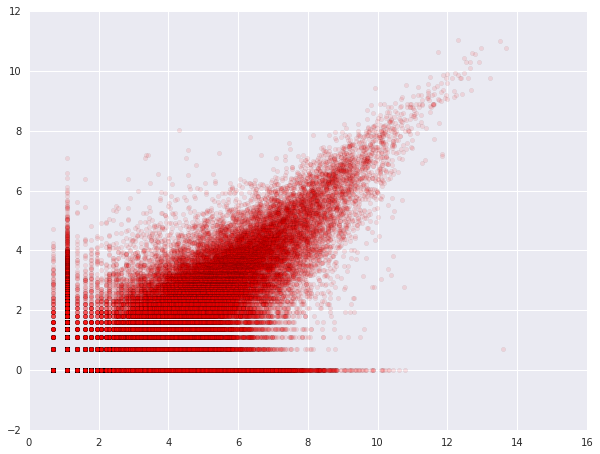

In [593]:
plt.figure(figsize=(10, 7.5))
sns.set_style("darkgrid")
plt.scatter(np.log(temp.total_count_j.values), np.log(temp.total_count_CK.values+1), c='r', alpha=0.1)

In [594]:
tag_j_dict = {key: idx for idx, key in enumerate(sorted(list(tag_j_set)))}
tag_CK_dict = {key: idx for idx, key in enumerate(sorted(list(tag_CK_set)))}
tag_ck2j_lookup = np.zeros((len(tag_j_dict), len(tag_CK_dict)))

In [595]:
temp = result.copy()
temp['branch_num_j'] = temp.tag_j.apply(lambda x: len(x.split()))
temp = temp.sort_values('branch_num_j')
temp.head()

,phrase_name,tag_CK,count_CK,tag_j,count_j,total_count_CK,total_count_j,branch_num_j
0,一,"Dd, Neu","4071, 58398",m,217830,62469,217830,1
47539,終結句,Nac,0,n,3,0,3,1
47540,終結者,Nab,0,n,15,0,15,1
47541,終老,VH11,6,n,51,6,51,1
47542,終身,Nad,94,d,1488,94,1488,1


In [596]:
# modified_count = [None] * temp.shape[0]
IDX = 0
t = time()
for index, row in temp.iterrows():
    _tag_ck = [x.strip() for x in row.tag_CK.split(',')]
    _count_ck = [int(x) for x in row.count_CK.split(',')]
    _tag_j = [x.strip() for x in row.tag_j.split(',')]
    _count_j = [int(x) for x in row.count_j.split(',')]
    lookup_tag_j_idx = []
    for x in _tag_j:
        lookup_tag_j_idx.append(tag_j_dict[x])
    if len(set(lookup_tag_j_idx)) != len(lookup_tag_j_idx):
        df = pd.DataFrame(np.asarray([_tag_j, lookup_tag_j_idx, _count_j]).T, columns=['t','a','b']).convert_objects(convert_numeric=True)
        df = df.groupby('a').agg('mean').reset_index()
        lookup_tag_j_idx = list(df.a.values)
        _count_j = list(df.b.values)
    for x in _tag_ck:
        lookup_tag_ck_idx = tag_CK_dict[x]
        weightSum_tag_j = float(sum(tag_ck2j_lookup[lookup_tag_j_idx, lookup_tag_ck_idx]))
        if weightSum_tag_j > 0:
            weight_tag_j = [float(tag_ck2j_lookup[_i, lookup_tag_ck_idx])/weightSum_tag_j for _i in lookup_tag_j_idx]
        else:
            l = len(set(lookup_tag_j_idx))
            weight_tag_j = [1.0 / float(l)] * len(lookup_tag_j_idx)
        tag_ck2j_lookup[lookup_tag_j_idx, lookup_tag_ck_idx] += weight_tag_j
    IDX += 1
#     if IDX > 1: break
print(time() - t) 


13.472139120101929


In [603]:
tag_ck2j_lookup[:,tag_CK_dict['VH11']]

array([  1.56686202e+03,   4.30000000e+01,   4.00000000e+00,
         1.50086180e+01,   5.10000000e+01,   2.10000000e+01,
         1.90119305e+02,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   2.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   2.53742063e+03,   1.40000000e+01,
         0.00000000e+00,   8.04400635e+02,   2.80000000e+01,
         0.00000000e+00,   0.00000000e+00,   1.53453878e+03,
         4.12326439e+00,   5.65486979e+02,   4.00000000e+00,
         2.80000000e+01,   1.15157254e+02,   7.00000000e+00,
         1.73783920e+02,   4.00000000e+00,   3.00000000e+00,
         1.00000000e+00,   1.80000000e+01,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   2.00000000e+00,
         2.70000000e+01,   0.00000000e+00,   1.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         1.73304535e+03,   0.00000000e+00,   1.00000000e+00,
         0.00000000e+00,

In [597]:
np.save('tag_ck2j_lookup', tag_ck2j_lookup)

In [598]:
with codecs.open('tag_CK_dict.json', 'w', encoding='utf-8') as f:
    json.dump(tag_CK_dict, f)
    
with codecs.open('tag_j_dict.json', 'w', encoding='utf-8') as f:
    json.dump(tag_j_dict, f)

In [604]:
modified_tag = [None] * temp.shape[0]
modified_count = [None] * temp.shape[0]
IDX = 0
t = time()
for index, row in temp.iterrows():
    _tag_ck = [x.strip() for x in row.tag_CK.split(',')]
    _count_ck = [float(x) for x in row.count_CK.split(',')]
    _tag_j = [x.strip() for x in row.tag_j.split(',')]
    _count_j = [float(x) for x in row.count_j.split(',')]
    lookup_tag_j_idx = []
    for x in _tag_j:
        lookup_tag_j_idx.append(tag_j_dict[x])
    if len(set(lookup_tag_j_idx)) != len(lookup_tag_j_idx):
        df = pd.DataFrame(np.asarray([_tag_j, lookup_tag_j_idx, _count_j]).T, columns=['t','a','b']).convert_objects(convert_numeric=True)
        df = df.groupby(['t','a']).agg('mean').reset_index()
        lookup_tag_j_idx = list(df.a.values)
        _count_j = list(df.b.values)
        _tag_j = list(df.t.values)
    to_ck_count = np.zeros(len(_tag_j))
    for iCK, x in enumerate(_tag_ck):
        lookup_tag_ck_idx = tag_CK_dict[x]
        weightSum_tag_j = float(sum(tag_ck2j_lookup[lookup_tag_j_idx, lookup_tag_ck_idx]))
        if weightSum_tag_j > 0:
            weight_tag_j = [float(tag_ck2j_lookup[_i, lookup_tag_ck_idx])/weightSum_tag_j for _i in lookup_tag_j_idx]
        else:
            print('!!!???')
            weight_tag_j = [1.0 / float(l)] * len(lookup_tag_j_idx)
        c = [0.9 * _v * _count_ck[iCK] + 0.1 * _count_j[_i] for _i, _v in enumerate(weight_tag_j)]
        to_ck_count += np.asarray(c)
    modified_tag[index] = ', '.join(_tag_j)
    modified_count[index] = ', '.join(list(to_ck_count.astype('int').astype('str')))
#     print(row.phrase_name)
#     print(_count_ck, _count_j, modified_count[index])
#     print(_tag_ck, _tag_j, modified_tag[index])
#     print('-----')
    IDX += 1
#     if IDX > 10: break
print(time() - t)


13.00542688369751


In [606]:
result2 = result.copy()

result2['modified_count'] = pd.Series(modified_count)
result2['modified_tag'] = pd.Series(modified_tag)

result2.to_csv('dict.intersect.csv', index=False)

result2.head(50)



,phrase_name,tag_CK,count_CK,tag_j,count_j,total_count_CK,total_count_j,modified_count,modified_tag
0,一,"Dd, Neu","4071, 58398",m,217830,62469,217830,99788,m
1,一一,Dh,205,m,1670,205,1670,351,m
2,一丁不識,VH11,0,i,3,0,3,0,i
3,一丁點,Nad,5,m,3,5,3,4,m
4,一下子,Dd,0,m,2333,0,2333,233,m
5,一丘之貉,Naea,0,i,12,0,12,1,i
6,一乾二淨,VH11,6,"i, l","2, 115",6,117,"4, 12","i, l"
7,一了百了,VH11,2,l,61,2,61,7,l
8,一五一十,Dh,2,m,127,2,127,14,m
9,一些,Neqa,3240,m,33468,3240,33468,6262,m


In [607]:
inter_CK = df_CK.phrase_name.isin(df_j.phrase_name)
# np.logical_not(inter_CK.values)
df_CK_remain = df_CK.iloc[np.logical_not(inter_CK.values)]
df_CK_remain.reset_index(inplace=True)
print(df_CK_remain.shape)
df_CK_remain.head()

(5833, 4)


,index,phrase_name,tag_CK,count_CK
0,5,一不做二不休,VH11,1
1,17,一個鼻孔出氣,VH11,0
2,19,一元方程式,Nac,0
3,25,一分收獲,Nad,0
4,28,一分錢一分貨,VH11,0


In [625]:
modified_tag = [None] * df_CK_remain.shape[0]
modified_count = [None] * df_CK_remain.shape[0]
sr_j_df = pd.Series(tag_j_dict,index=tag_j_dict.keys())
t = time()
for index, row in df_CK_remain.iterrows():
    _tag_ck = [x.strip() for x in row.tag_CK.split(',')]
    _count_ck = [float(x) for x in row.count_CK.split(',')]
    exp_tag = [sr_j_df[sr_j_df == tag_ck2j_lookup[:, tag_CK_dict[x]].argmax()].index.values[0] for x in _tag_ck]
    exp_count = [max(len(row.phrase_name), int(_c)) for _c in _count_ck]
    tt = pd.DataFrame(np.asarray([exp_tag, exp_count]).T, columns=['a','b']).convert_objects(convert_numeric=True)
    tt = tt.groupby('a').agg({'b': 'sum'}).reset_index()
    modified_tag[index] = ', '.join(list(tt.a.values))
    modified_count[index] = ', '.join([str(_i) for _i in list(tt.b.values)])
print(time() - t)

/Users/tripper/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


18.640750885009766


In [631]:
result_CK_remain = df_CK_remain.copy()
result_CK_remain.drop('index', axis=1, inplace=True)
result_CK_remain['modified_tag'] = pd.Series(modified_tag)
result_CK_remain['modified_count'] = pd.Series(modified_count)
result_CK_remain.to_csv('result_CK_remain.csv', index=False)
result_CK_remain.head(50)

,phrase_name,tag_CK,count_CK,modified_tag,modified_count
0,一不做二不休,VH11,1,i,6
1,一個鼻孔出氣,VH11,0,i,6
2,一元方程式,Nac,0,n,5
3,一分收獲,Nad,0,n,4
4,一分錢一分貨,VH11,0,i,6
5,一哄而散,VA11,5,v,5
6,一回生二回熟,VH11,0,i,6
7,一字,Dh,11,n,11
8,一年生植物,Nab,0,n,5
9,一愣,VH11,6,i,6


In [635]:
inter_j = df_j.phrase_name.isin(df_CK.phrase_name)
df_j_remain = df_j.iloc[np.logical_not(inter_j.values)]
df_j_remain.reset_index().drop('index', axis=1, inplace=True)
df_j_remain.to_csv('df_j_remain.csv', index=False)
df_j_remain.head(10)


,phrase_name,tag_j,count_j
0,1號店,n,3
1,4S店,n,3
2,4s店,n,3
3,AA制,n,3
4,AB型,n,3
5,AT&T,nz,3
6,A型,n,3
7,A座,n,3
8,A股,n,3
9,A輪,n,3


In [642]:
T = ['phrase_name','modified_tag','modified_count']
a = result2[T].values
print(a.shape)
b = result_CK_remain[T].values
print(b.shape)
c = df_j_remain[['phrase_name','tag_j','count_j']].values
print(c.shape)
d = np.concatenate((a, b, c), axis=0)
df_union = pd.DataFrame(d, columns=['phrase_name', 'union_tag', 'union_count'])
print(df_union.shape)
df_union.head(10)

(71615, 3)
(5833, 3)
(277357, 3)
(354805, 3)


,phrase_name,union_tag,union_count
0,一,m,99788
1,一一,m,351
2,一丁不識,i,0
3,一丁點,m,4
4,一下子,m,233
5,一丘之貉,i,1
6,一乾二淨,"i, l","4, 12"
7,一了百了,l,7
8,一五一十,m,14
9,一些,m,6262


In [663]:
# df_union['has_multi_tag'] = df_union.apply(lambda x: x['union_tag'].find(',') > 0, axis = 1)
df_union['has_multi_tag'] = df_union.union_tag
df_union.has_multi_tag = df_union.has_multi_tag.apply(lambda x: len(x.split(',')) )
print(df_union.dtypes)
df_union.head(10)

phrase_name      object
union_tag        object
union_count      object
has_multi_tag     int64
dtype: object


,phrase_name,union_tag,union_count,has_multi_tag
0,一,m,99788,1
1,一一,m,351,1
2,一丁不識,i,0,1
3,一丁點,m,4,1
4,一下子,m,233,1
5,一丘之貉,i,1,1
6,一乾二淨,"i, l","4, 12",2
7,一了百了,l,7,1
8,一五一十,m,14,1
9,一些,m,6262,1


In [665]:
df_union.to_csv('df_union.csv', index=False)

In [709]:
df_union_multi = df_union.query('has_multi_tag > 1')
df_union_multi_unroll = pd.DataFrame()
t = time()
for index, row in df_union_multi.iterrows():
    unroll_tag = [_x.strip() for _x in row.union_tag.split(',')]
    unroll_count = [_x.strip() for _x in row.union_count.split(',')]
    s = pd.DataFrame({'phrase_name': [row.phrase_name]*len(unroll_tag), 'unroll_tag': unroll_tag, 'unroll_count': unroll_count})
    df_union_multi_unroll = df_union_multi_unroll.append(s)
print(time() - t)
print(df_union_multi_unroll.shape)
df_union_multi_unroll.head(10)


1.3547520637512207
(2220, 3)


,phrase_name,unroll_count,unroll_tag
0,一乾二淨,4,i
1,一乾二淨,12,l
0,一夥兒,0,r
1,一夥兒,0,z
0,一箭雙鵰,4,i
1,一箭雙鵰,0,nz
0,一見鍾情,13,i
1,一見鍾情,2,nr
0,七絃琴,2,i
1,七絃琴,0,nz


In [720]:
a = df_union.query('has_multi_tag == 1')[['phrase_name', 'union_count', 'union_tag']].values
b = df_union_multi_unroll[['phrase_name','unroll_count','unroll_tag']].values
c = np.concatenate((a, b), axis=0)
df_union_ready = pd.DataFrame(c, columns=['phrase_name', 'union_count', 'union_tag'])
print(df_union_ready.shape)
df_union_ready.tail(50)

(355917, 3)


,phrase_name,union_count,union_tag
355867,颳走,3,v
355868,颳走,3,vn
355869,颳起,3,v
355870,颳起,3,vn
355871,颳起來,3,i
355872,颳起來,3,v
355873,食不餬口,3,l
355874,食不餬口,3,v
355875,飯囊酒甕,3,i
355876,飯囊酒甕,3,n


In [721]:
df_union_ready.to_csv('df_union_ready.csv', sep=' ', index = False)

In [722]:
# lookup_tag_j_idx
# print(_tag_ck)
# print(_tag_j)
# print(weightSum_tag_j)
# print(weight_tag_j)
# row
# print(tag_CK_dict[x])
# lookup_tag_j_idx=[29,54,54]
# _count_j = [200000.1, 100.23,105.0922]
# lookup_tag_j_idx = [29,54,54]
# _count_j = [int(x) for x in row.count_j.split(',')]
# df = pd.DataFrame(np.asarray([lookup_tag_j_idx, _count_j]).T, columns=['a','b'])
# df = df.groupby('a').agg('mean').reset_index()
# lookup_tag_j_idx = list(df.a.values)
# lookup_tag_j_idx
# df = pd.DataFrame(np.asarray([_tag_j, lookup_tag_j_idx, _count_j]).T, columns=['t','a','b']).convert_objects(convert_numeric=True)
# df = df.groupby('a').agg('mean').reset_index()



# lookup_tag_j_idx = [20, 20]
# _count_j = [int(x) for x in row.count_j.split(',')]
# df = pd.DataFrame(np.asarray([_tag_j, lookup_tag_j_idx, _count_j]).T, columns=['t','a','b']).convert_objects(convert_numeric=True)
# df = df.groupby(['t','a']).agg('mean').reset_index()
# df


# df.dtypes
# to_ck_count.astype('int').astype('str')

# tag_ck2j_lookup[:,1]
# tag_j_dict.items()
